In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')


from scipy.stats import chi2_contingency, iqr
import stat

In [6]:
# get the data
data = pd.read_csv('Datasciencefield_salary.csv',index_col=None)

In [7]:
data.head()

,Unnamed: 0,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,1,2020,Data Scientist,MI,FT,6352272.0,DE,DE,L,0
1,2,2020,Machine Learning Scientist,SE,FT,20688070.0,JP,JP,S,0
2,3,2020,Big Data Engineer,SE,FT,8674985.0,GB,GB,M,50
3,4,2020,Product Data Analyst,MI,FT,1591390.0,HN,HN,S,0
4,5,2020,Machine Learning Engineer,SE,FT,11935425.0,US,US,L,50


In [17]:
# lets change the remote_working ratio column variable

data['Remote_Working_Ratio'] = data['Remote_Working_Ratio'].map({0:'No remote',50:'Partial remote',100:'Full remote'})


In [10]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [11]:
data.shape

(607, 9)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          607 non-null    int64  
 1   Designation           607 non-null    object 
 2   Experience            607 non-null    object 
 3   Employment_Status     607 non-null    object 
 4   Salary_In_Rupees      607 non-null    float64
 5   Employee_Location     607 non-null    object 
 6   Company_Location      607 non-null    object 
 7   Company_Size          607 non-null    object 
 8   Remote_Working_Ratio  607 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 42.8+ KB


In [18]:
data.describe()

,Working_Year,Salary_In_Rupees
count,607.000000,6.070000e+02
mean,2021.405272,8.935485e+06
std,0.692133,5.646034e+06
min,2020.000000,2.274890e+05
25%,2021.000000,4.991076e+06
50%,2022.000000,8.081874e+06
75%,2022.000000,1.193542e+07
max,2022.000000,4.774170e+07


In [23]:
for i in data:
    print(data[i].value_counts())
    print('****************************************')
    

2022    318
2021    217
2020     72
Name: Working_Year, dtype: int64
****************************************
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager  

### Categorical variables

In [19]:
# Categorical variables

category = []

for c in data.columns:
    if data[c].dtypes in ['object']:
        category.append(c)
    

In [20]:
category

['Designation',
 'Experience',
 'Employment_Status',
 'Employee_Location',
 'Company_Location',
 'Company_Size',
 'Remote_Working_Ratio']

In [21]:
data.loc[:,category]

,Designation,Experience,Employment_Status,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,Data Scientist,MI,FT,DE,DE,L,No remote
1,Machine Learning Scientist,SE,FT,JP,JP,S,No remote
2,Big Data Engineer,SE,FT,GB,GB,M,Partial remote
3,Product Data Analyst,MI,FT,HN,HN,S,No remote
4,Machine Learning Engineer,SE,FT,US,US,L,Partial remote
...,...,...,...,...,...,...,...
602,Data Engineer,SE,FT,US,US,M,Full remote
603,Data Engineer,SE,FT,US,US,M,Full remote
604,Data Analyst,SE,FT,US,US,M,No remote
605,Data Analyst,SE,FT,US,US,M,Full remote


In [25]:
import colorama
from colorama import Fore

### Statistical Testing using Chisquare

Designation:


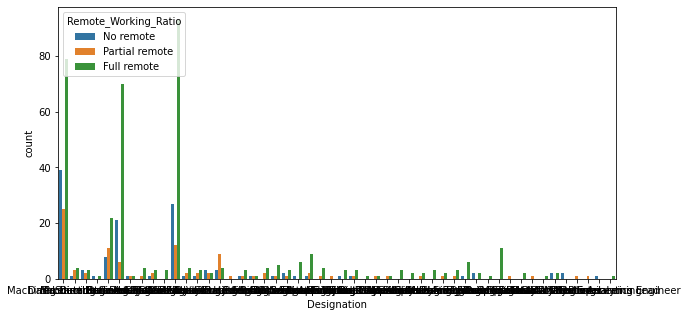

 'Designation' is Good Predictor
p_val=0.005254968562783113

Experience:


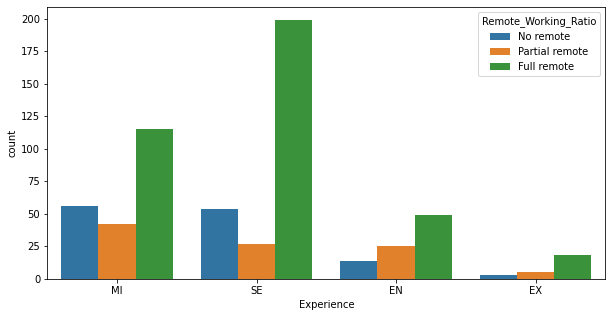

 'Experience' is Good Predictor
p_val=5.59056308325481e-05

Employment_Status:


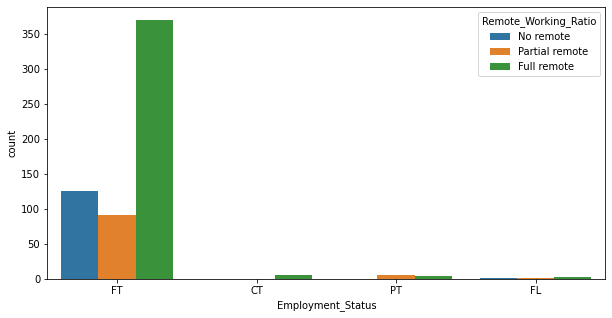

 'Employment_Status' is Good Predictor
p_val=0.005888028912184732

Employee_Location:


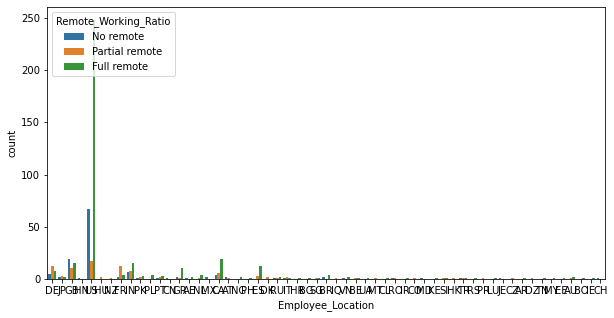

 'Employee_Location' is Good Predictor
p_val=6.649672204564309e-12

Company_Location:


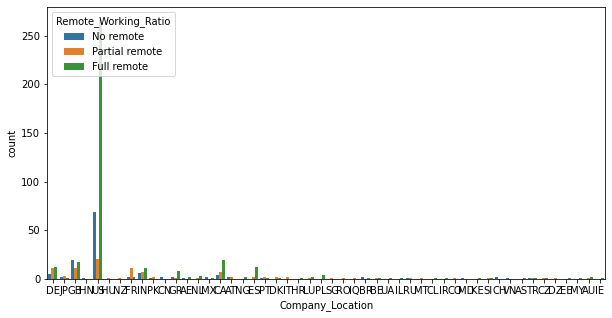

 'Company_Location' is Good Predictor
p_val=1.2738023024006982e-14

Company_Size:


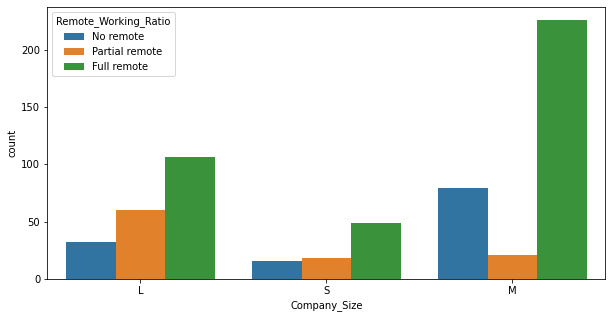

 'Company_Size' is Good Predictor
p_val=5.87058295010386e-11

Remote_Working_Ratio:


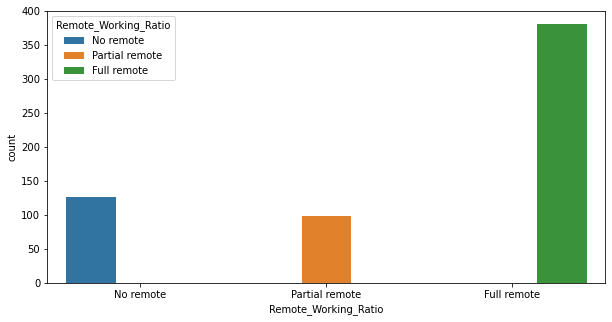

 'Remote_Working_Ratio' is Good Predictor
p_val=1.4694440814975036e-261



In [29]:
for i in category:
    print(i+":")
    plt.figure(figsize=(10,5))
    sns.countplot(x=i,data=data, hue='Remote_Working_Ratio')
    plt.show()
    a=np.array(pd.crosstab(data['Remote_Working_Ratio'],data[i]))
    (stats,p,dof,_) = chi2_contingency(a,correction=False)
    
    if p>0.05:
        print(Fore.RED + " '{}' is a bad Predictor".format(i))
        print('p_val={}\n'.format(p))
    else:
        print(Fore.GREEN + " '{}' is Good Predictor".format(i))
        print('p_val={}\n'.format(p))

All the columns in category are Good predictor of Remoteworking ratio

### For continuous variables

In [31]:
column_name = data.columns.tolist()
continuous_var = list(set(column_name)-set(category))

In [32]:
continuous_var

['Salary_In_Rupees', 'Working_Year']

In [33]:
data.loc[:,continuous_var]

,Salary_In_Rupees,Working_Year
0,6352272.0,2020
1,20688070.0,2020
2,8674985.0,2020
3,1591390.0,2020
4,11935425.0,2020
...,...,...
602,12253703.0,2022
603,10025757.0,2022
604,10264466.0,2022
605,11935425.0,2022


Salary_In_Rupees:


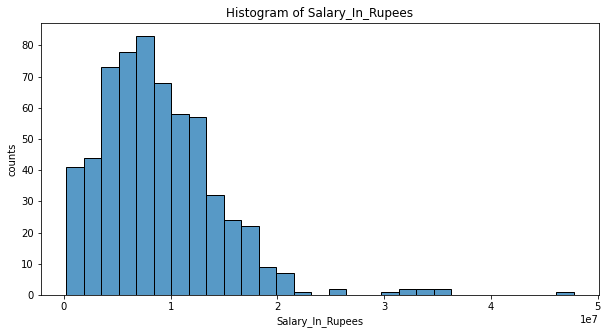

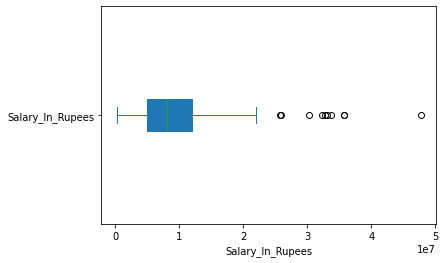

Working_Year:


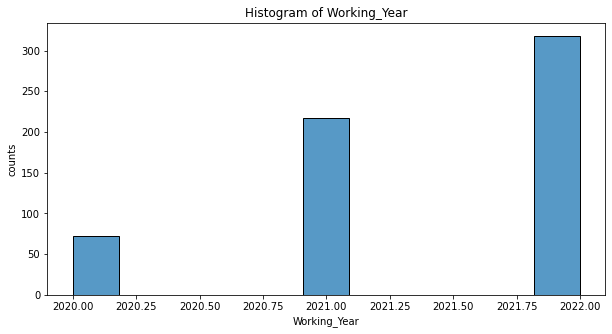

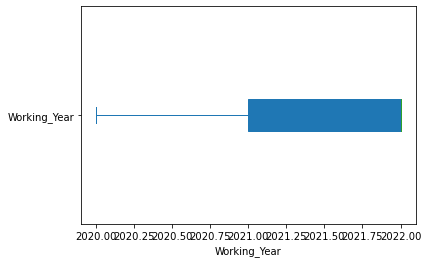

In [34]:
# lets visualise the continuous data

for i in continuous_var:
    print(i+":")
    plt.figure(figsize=(10,5))
    sns.histplot(data[i])
    plt.xlabel(i)
    plt.ylabel('counts')
    plt.title('Histogram of '+i)
    plt.show()
    data[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()

### Treating outliers 

In [35]:
iqr = iqr

Salary_In_Rupees:


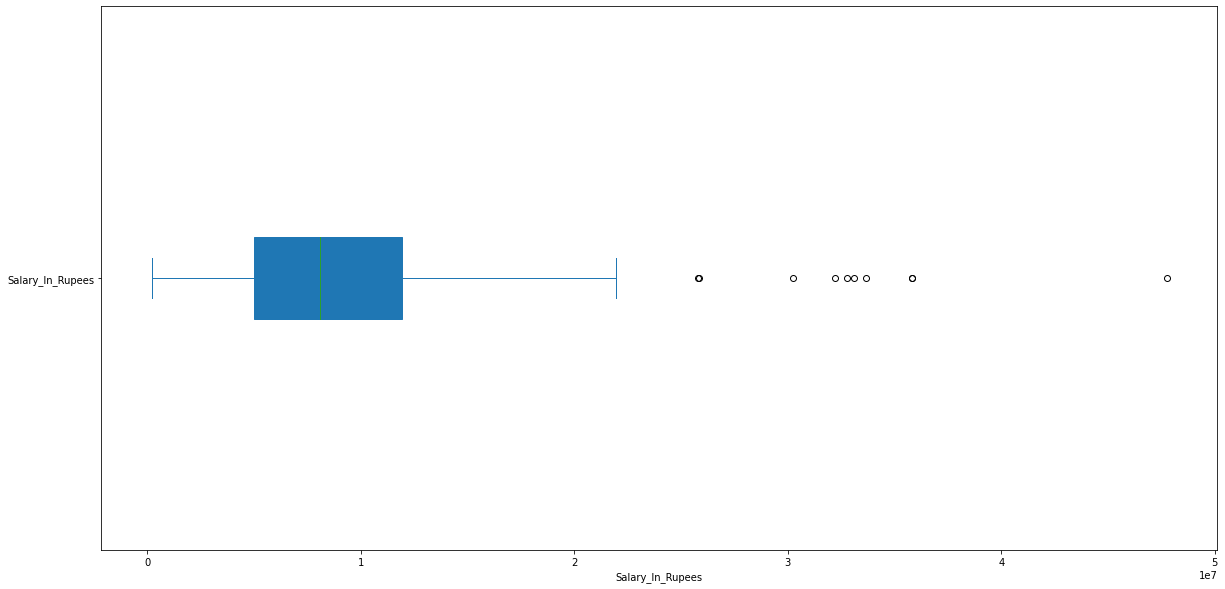

Left Limit:-5425447.5
Right Limit:22351948.5
iqr:6944349.0
if left outlier type 'left' else 'right' else 'both' if no outliers then type:right
by what number do you want to replace6944349


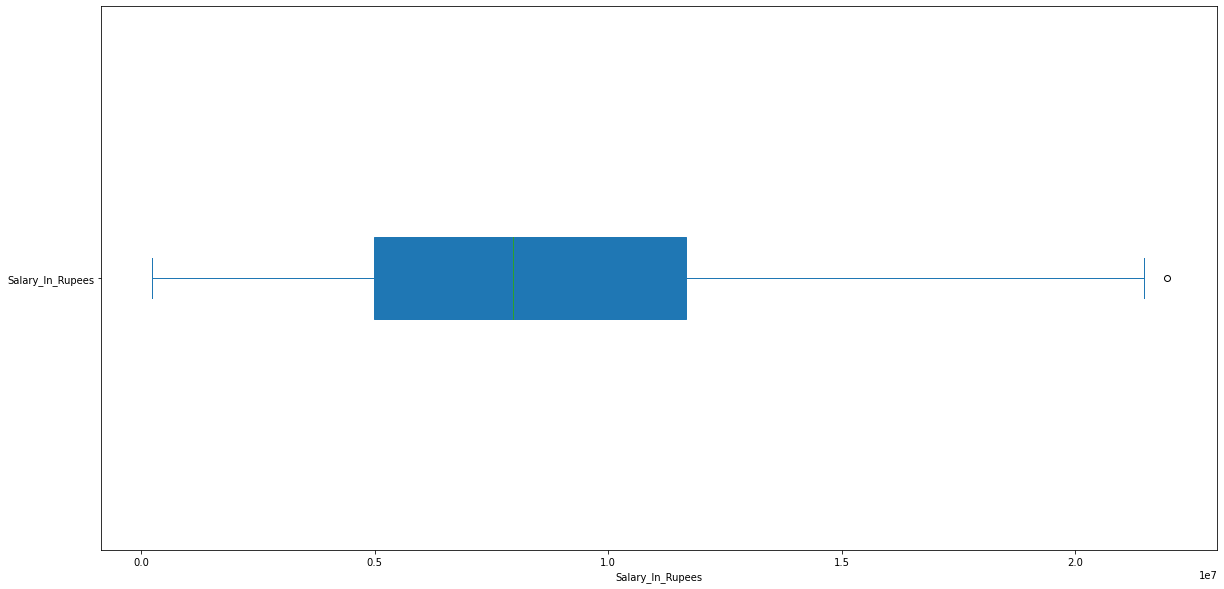

Working_Year:


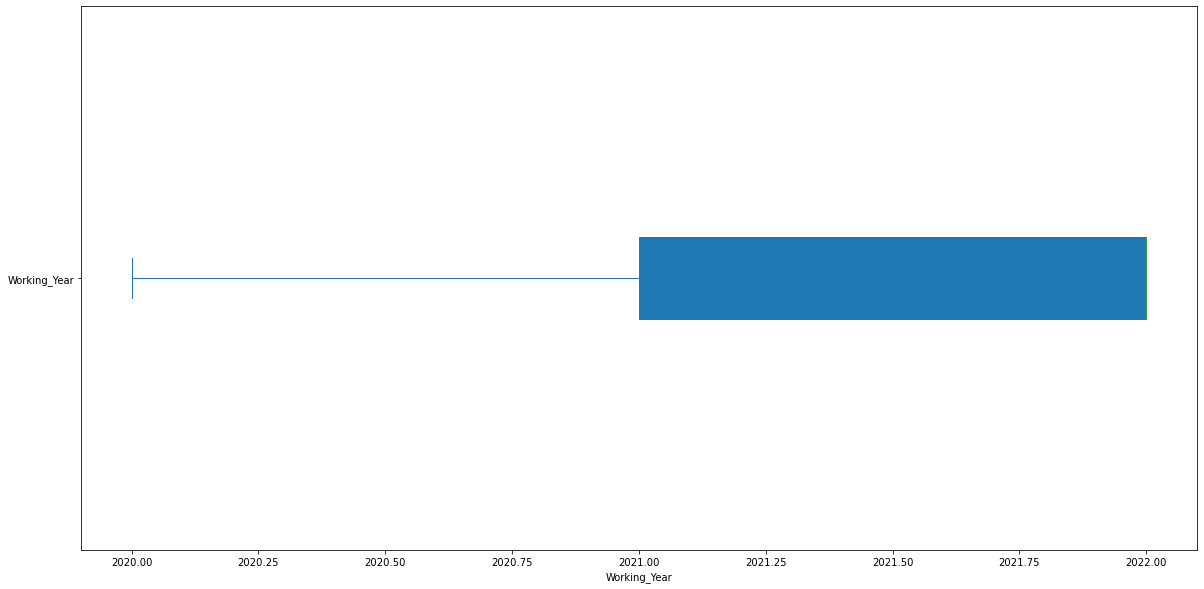

Left Limit:2019.5
Right Limit:2023.5
iqr:1.0
if left outlier type 'left' else 'right' else 'both' if no outliers then type:no


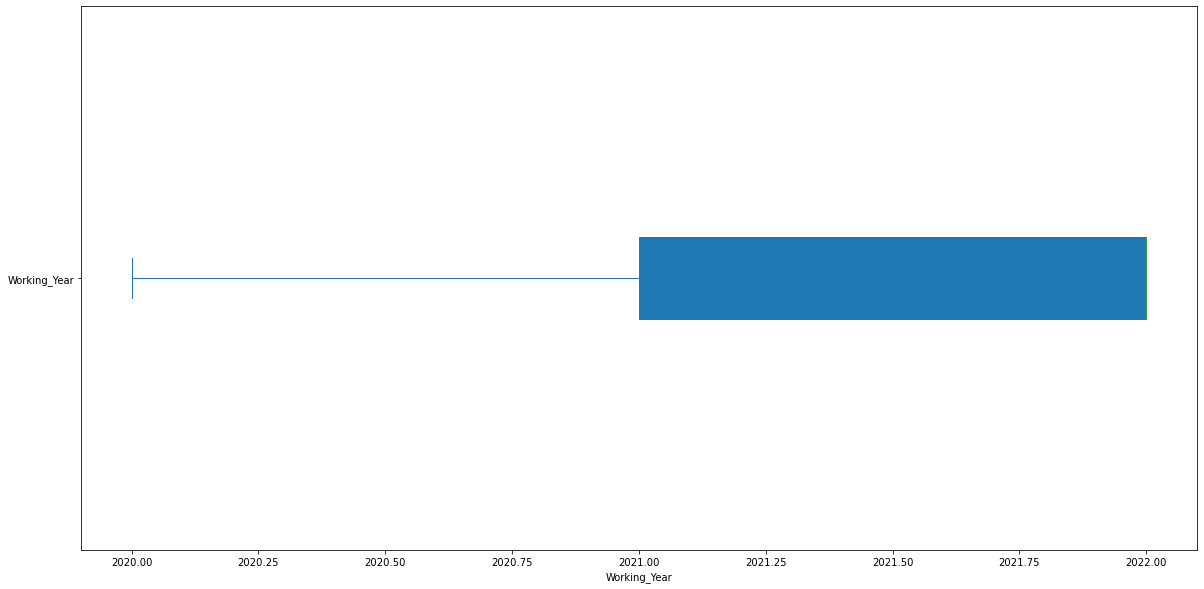

In [38]:
for i in continuous_var:
    print(i+":")
    plt.figure(figsize=(20,10))
    data[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()
    
    iqr = data[i].describe()['75%']-data[i].describe()['25%']
    right_lim = data[i].quantile(0.75)+1.5*iqr
    left_lim = data[i].quantile(0.25)-1.5*iqr
    print('Left Limit:{}'.format(left_lim))
    print('Right Limit:{}'.format(right_lim))
    print('iqr:{}'.format(iqr))
    
    a=input("if left outlier type 'left' else 'right' else 'both' if no outliers then type:" )
    a=a.lower()
    
    if a=='left':
        lo = float(input('by what number do you want to replace'))
        data[i]=[lo if val<left_lim else val for val in data[i]]
    elif a=='right':
        ro=float(input('by what number do you want to replace'))
        data[i]=[ro if val>right_lim else val for val in data[i]]
    elif a=='both':
        lo = float(input('by what number do you want to replace'))
        
        ro=float(input('by what number do you want to replace'))
        data[i]=[lo if val<left_lim else val for val in data[i]]
        data[i]=[ro if val>right_lim else val for val in data[i]]
        
    elif a =='no':
        pass
    plt.figure(figsize=(20,10))
    data[i].plot.box(vert=False, patch_artist=True)
    plt.xlabel(i)
    plt.show()

Salary_In_Rupees:


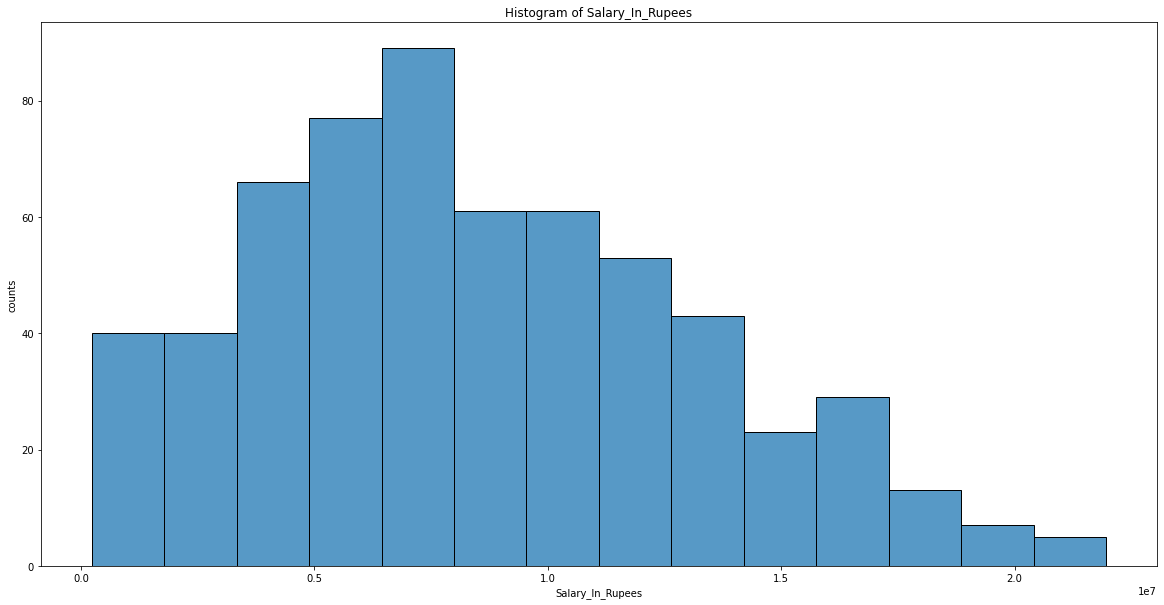

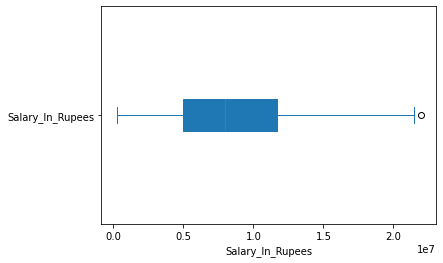

Working_Year:


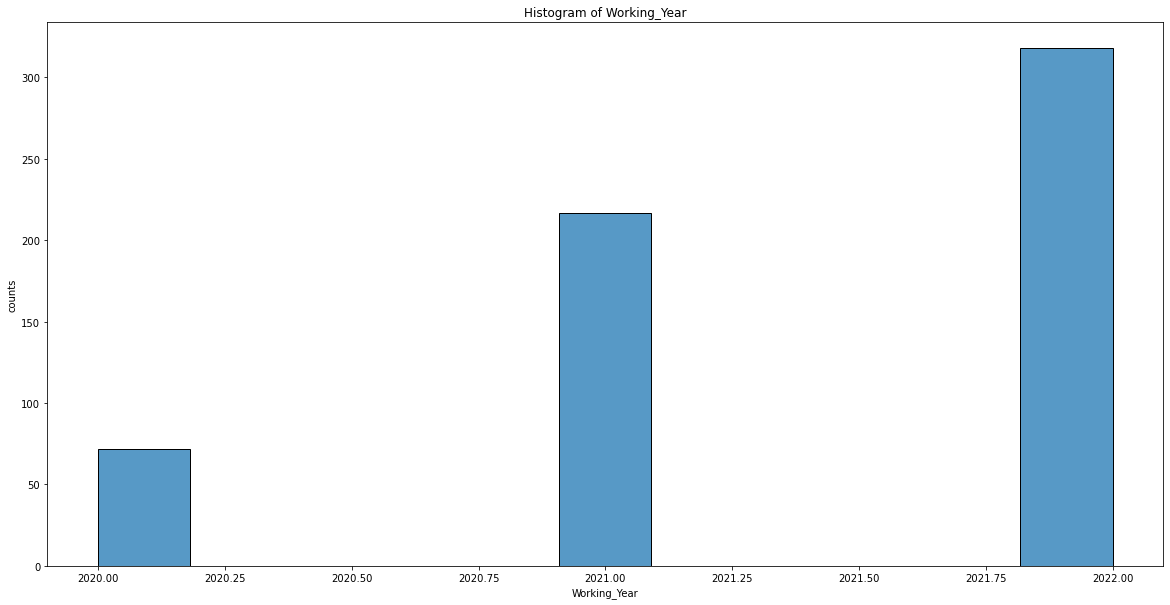

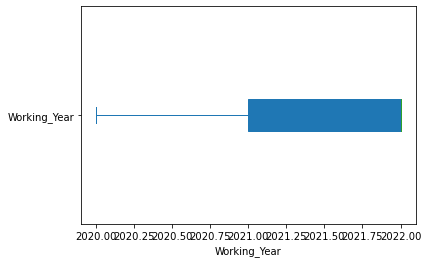

In [39]:
for i in continuous_var:
    print(i+":")
    plt.figure(figsize=(20,10))
    sns.histplot(data[i])
    plt.xlabel(i)
    plt.ylabel('counts')
    plt.title('Histogram of '+i)
    plt.show()
    
    data[i].plot.box(vert=False,patch_artist=True)
    plt.xlabel(i)
    plt.show()

Salary_In_Rupees:


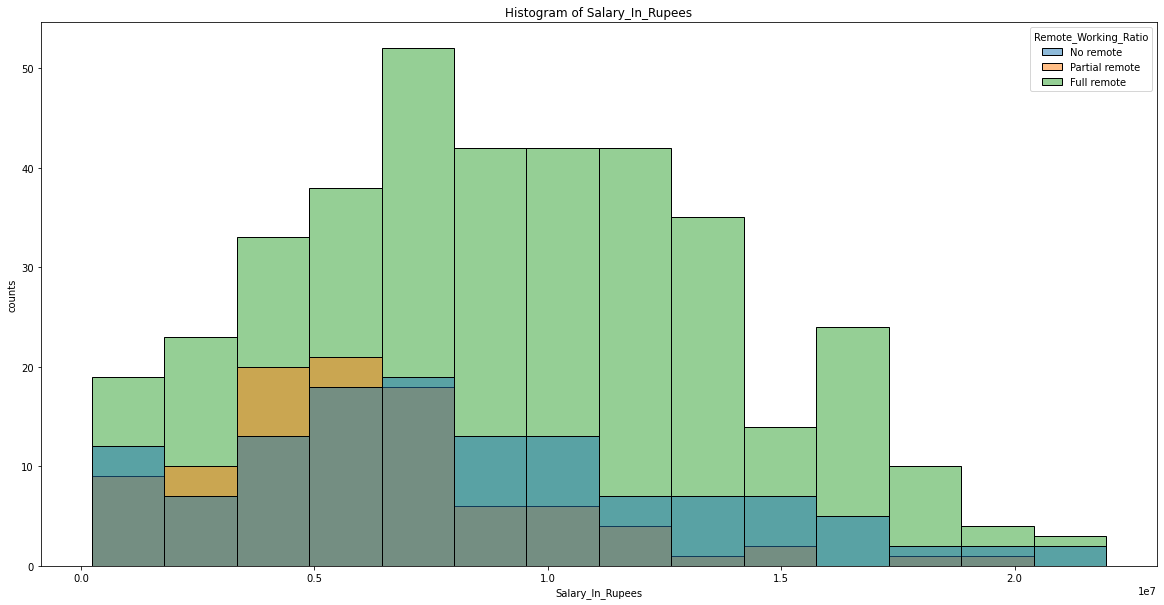

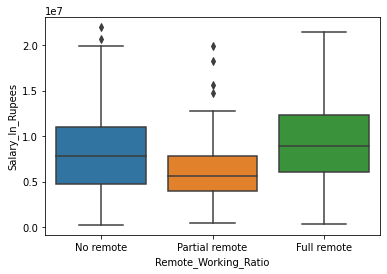

Working_Year:


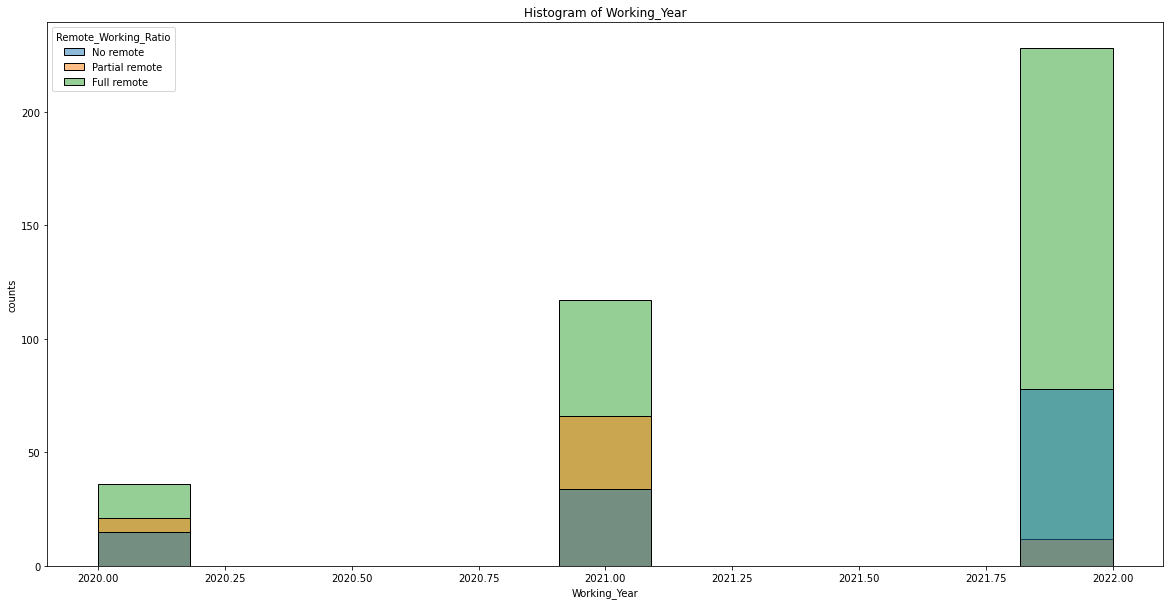

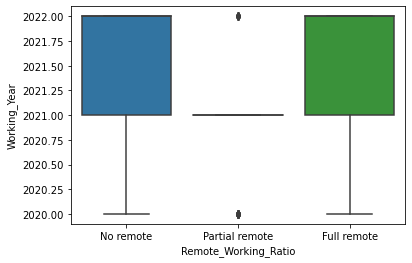

In [40]:
for i in continuous_var:
    print(i+":")
    plt.figure(figsize=(20,10))
    sns.histplot(x=data[i],hue=data['Remote_Working_Ratio'])
    plt.xlabel(i)
    plt.ylabel('counts')
    plt.title('Histogram of '+i)
    plt.show()
    sns.boxplot(y=data[i],x=data['Remote_Working_Ratio'])
    plt.show()

### Statistical Testing using Annova

In [42]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
import statsmodels.api as smf

In [43]:
for i in continuous_var:
    print(i+":")
    print('ANOVA:\n')
    mod = ols(i+'~Remote_Working_Ratio',data=data).fit()
    aov_table = smf.stats.anova_lm(mod,type=2)
    print(aov_table,'\n')
    print('Pvalue={}\n'.format(aov_table['PR(>F)'][0]))
    p = aov_table['PR(>F)'][0]
    
    if p>0.05:
        print(Fore.RED + "'{}' is a bad predictor'\n".format(i))
        print("p_val={}\n".format(p))
        
    else:
        print("TUKEY:\n")
        print(Fore.RED +"'{}'is a good predictor'\n".format(i))
        print(Fore.GREEN +"'{}' is a Good Predictor".format(i))
        tukey = pairwise_tukeyhsd(data[i],data['Remote_Working_Ratio'],alpha=0.05)
        print(tukey,'\n')

Salary_In_Rupees:
ANOVA:

                         df        sum_sq       mean_sq          F  \
Remote_Working_Ratio    2.0  7.360428e+14  3.680214e+14  18.180076   
Residual              604.0  1.222684e+16  2.024312e+13        NaN   

                            PR(>F)  
Remote_Working_Ratio  2.152868e-08  
Residual                       NaN   

Pvalue=2.152867705115764e-08

TUKEY:

'Salary_In_Rupees'is a good predictor'

'Salary_In_Rupees' is a Good Predictor
               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
   group1       group2        meandiff   p-adj      lower         upper     reject
----------------------------------------------------------------------------------
Full remote      No remote  -962675.8766 0.0931  -2045809.617   120457.8638  False
Full remote Partial remote -3036786.4747    0.0 -4229277.4756 -1844295.4737   True
  No remote Partial remote  -2074110.598 0.0018 -3491369.9734  -656851.2226   True
-----------------------------------

All the continuous variables are good predictor of remote working ratio

In [44]:
data.head()

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,2020,Data Scientist,MI,FT,6352272.0,DE,DE,L,No remote
1,2020,Machine Learning Scientist,SE,FT,20688070.0,JP,JP,S,No remote
2,2020,Big Data Engineer,SE,FT,8674985.0,GB,GB,M,Partial remote
3,2020,Product Data Analyst,MI,FT,1591390.0,HN,HN,S,No remote
4,2020,Machine Learning Engineer,SE,FT,11935425.0,US,US,L,Partial remote


### Prepare the data for machine learning

In [45]:
df1 = data.copy()

In [46]:
# Convert categorical variables to numbers


def convert_data(df):
    for col in df.columns:
        if df[col].dtypes in ['object']:
            df[col] = df[col].astype('category').cat.codes
    return df

In [54]:
df3 = convert_data(df1)

In [55]:
df3.head()

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,2020,22,2,2,6352272.0,14,12,0,1
1,2020,41,3,2,20688070.0,32,29,2,1
2,2020,7,3,2,8674985.0,20,18,1,2
3,2020,47,2,2,1591390.0,23,20,2,1
4,2020,38,3,2,11935425.0,55,48,0,2


### Correlation between variables

<AxesSubplot:>

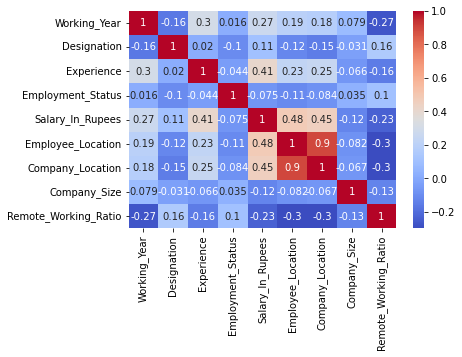

In [57]:
sns.heatmap(df3.corr(),annot=True, cmap='coolwarm')

In [52]:
# lets change the remote_working ratio column variable

df2['Remote_Working_Ratio'] = df2['Remote_Working_Ratio'].map({1:'No remote',2:'Partial remote',0:'Full remote'})


In [53]:
df2.head()

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,2020,22,2,2,6352272.0,14,12,0,No remote
1,2020,41,3,2,20688070.0,32,29,2,No remote
2,2020,7,3,2,8674985.0,20,18,1,Partial remote
3,2020,47,2,2,1591390.0,23,20,2,No remote
4,2020,38,3,2,11935425.0,55,48,0,Partial remote
